# Product Performance

Objective:

Analyze product-level performance to identify:
- ⭐ Top-selling and high-profit products
- ⚠️ Underperforming or loss-making products
- 📦 Category/Sub-category trends
- 📈 Recommendations for pricing, bundling, or discontinuation

## Setup + Load Data

🎯 Objective:

Prepare your environment by loading necessary libraries and importing the cleaned dataset containing product-level transactional data.

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Step 2: Load the cleaned dataset
df = pd.read_csv("/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv")

# Step 3: Basic inspection
print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Step 4: Preview relevant product-related columns
product_cols = ['Product_ID', 'Product_Name', 'Category', 'Sub-Category',
                'Sales', 'Profit', 'Quantity', 'Discount', 'Shipping_Cost']

df_product = df[product_cols].copy()
display(df_product.head())

✅ Dataset Loaded Successfully
Shape: (51290, 28)
Columns: ['Unnamed: 0', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Shipping_Delay_Days', 'Profit_Margin', 'Total_Order_Value', 'Is_Returned']


,Product_ID,Product_Name,Category,Sub-Category,Sales,Profit,Quantity,Discount,Shipping_Cost
0,TEC-PH-5816,Samsung Convoy 3,Technology,Phones,221.980,62.1544,2,0.0,40.77
1,FUR-CH-5379,"Novimex Executive Leather Armchair, Black",Furniture,Chairs,3709.395,-288.7650,9,0.1,923.63
2,TEC-PH-5356,"Nokia Smart Phone, with Caller ID",Technology,Phones,5175.171,919.9710,9,0.1,915.49
3,TEC-PH-5267,"Motorola Smart Phone, Cordless",Technology,Phones,2892.510,-96.5400,5,0.1,910.16
4,TEC-CO-6011,"Sharp Wireless Fax, High-Speed",Technology,Copiers,2832.960,311.5200,8,0.0,903.04


## Key Observations

1. **Product Variety**:  
   - Products span across **Technology**, **Furniture**, and **Office Supplies**.
   - **Phones** (Technology) and **Chairs** (Furniture) are prominent sub-categories.

2. **Profit Distribution**:  
   - Some products like **Samsung Convoy 3** have positive profits.
   - **Novimex Executive Leather Armchair** is **unprofitable** (-$288.77), indicating potential for pricing adjustments or discontinuation.

3. **Sales Volume**:  
   - High-selling products, like **Nokia Smart Phone**, show strong sales (**$5,175.17** for 9 units).

4. **Discount Impact**:  
   - Discounts (e.g., **10%** on **Nokia Smart Phone**) affect profitability, especially in **loss-making products** like the **Novimex Chair**.

5. **Shipping Costs**:  
   - Moderate shipping costs (**$40.77** for **Samsung Convoy 3**) but higher in **loss-making items** (e.g., **$923.63** for **Novimex Chair**).



---

## Product-Level Aggregation

Objective:

Aggregate the data at the product level to calculate:
- Total Sales, Profit, and Quantity per product
- Profit Margin and Sales Volume
- Identify top performers and underperformers

In [3]:
# Step 1: Group by Product and aggregate key metrics
product_perf_df = df_product.groupby('Product_Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',  # average discount per product
    'Shipping_Cost': 'sum'
}).reset_index()

# Step 2: Calculate Profit Margin for each product
product_perf_df['Profit_Margin'] = product_perf_df['Profit'] / product_perf_df['Sales']

# Step 3: Rank products by performance
product_perf_df['Profit_Rank'] = product_perf_df['Profit'].rank(ascending=False)
product_perf_df['Sales_Rank'] = product_perf_df['Sales'].rank(ascending=False)
product_perf_df['Quantity_Rank'] = product_perf_df['Quantity'].rank(ascending=False)

# Step 4: Sort products by Profit to identify top performers and loss-makers
top_products = product_perf_df.sort_values(by='Profit', ascending=False).head(10)
loss_products = product_perf_df.sort_values(by='Profit', ascending=True).head(10)

# Step 5: Preview the aggregated performance table
display(product_perf_df.head())

# Optional: Save the result to a CSV file for analysis or report generation
product_perf_df.to_csv('product_performance_summary.csv', index=False)

,Product_Name,Sales,Profit,Quantity,Discount,Shipping_Cost,Profit_Margin,Profit_Rank,Sales_Rank,Quantity_Rank
0,"""While you Were Out"" Message Book, One Form pe...",25.228,10.3880,8,0.133333,5.10,0.411765,2927.0,3714.0,3530.0
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,16.7678,11,0.100000,6.09,0.406000,2801.0,3630.0,3364.0
2,#10 Self-Seal White Envelopes,108.682,52.1230,10,0.050000,13.43,0.479592,2284.0,3288.0,3427.5
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,223.1408,32,0.057143,54.03,0.456410,1362.0,2604.0,1994.5
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,115.2806,37,0.080000,36.95,0.402134,1796.0,2870.0,1817.0


## 📊 Product Performance Summary

### 🧾 Key Observations:

| Product Name | Sales ($) | Profit ($) | Quantity | Discount (%) | Shipping Cost ($) | Profit Margin | Profit Rank | Sales Rank | Quantity Rank |
|--------------|-----------|------------|----------|--------------|-------------------|---------------|-------------|------------|---------------|
| "While you Were Out" Message Book | 25.23   | 10.39      | 8        | 13.33        | 5.10              | 0.41          | 2927        | 3714       | 3530          |
| #10 Gummed Flap White Envelopes    | 41.30   | 16.77      | 11       | 10.00        | 6.09              | 0.41          | 2801        | 3630       | 3364          |
| #10 Self-Seal White Envelopes      | 108.68  | 52.12      | 10       | 5.00         | 13.43             | 0.48          | 2284        | 3288       | 3427.5        |
| #10 White Business Envelopes      | 488.90  | 223.14     | 32       | 5.71         | 54.03             | 0.46          | 1362        | 2604       | 1994.5        |
| #10- 4 1/8" x 9 1/2" Recycled Envelopes | 286.67 | 115.28     | 37       | 8.00         | 36.95             | 0.40          | 1796        | 2870       | 1817          |



### ✅ Key Insights:

1. **High-Profit Products**:
   - **#10 White Business Envelopes** stands out as a high-profit product (**$223.14**), but with high **shipping cost** (**$54.03**), which could erode profit margins.
   - The **#10 Self-Seal White Envelopes** also shows a healthy **profit margin** of **47.96%**, with moderate sales and shipping cost.

2. **Low-Profit Products**:
   - **"While you Were Out" Message Book** and **#10 Gummed Flap White Envelopes** show **low profit** relative to their sales.
   - These products may need to be **re-evaluated for pricing or discount strategies** to improve profitability.

3. **Shipping Costs Impact**:
   - Shipping costs for some products (e.g., **#10 White Business Envelopes**) are disproportionately high compared to their profit, suggesting an opportunity for **logistics optimization**.

4. **Sales and Quantity Performance**:
   - Products like **#10 White Business Envelopes** and **#10- 4 1/8" x 9 1/2" Recycled Envelopes** rank high in **sales** and **quantity**, but have **different profit margins**, highlighting that **sales volume does not always equate to high profit**.



### 📌 Recommendations:

- **High Sales, Low Margin**: Reassess products like **"While you Were Out" Message Book** for pricing or cost reductions.
- **Shipping Optimization**: Consider **shipping cost reduction strategies** for high-volume products with low margins (e.g., **#10 White Business Envelopes**).
- **Focus on High Profit Margin Products**: Increase focus on products with higher profit margins like **#10 Self-Seal White Envelopes** and **#10- 4 1/8" x 9 1/2" Recycled Envelopes**.
- **Upsell High-Volume, Low-Margin Products**: Bundle low-margin, high-volume products with high-margin items to increase average order value.


---

## Category & Sub-Category Performance

Objective:

Analyze performance across Category and Sub-Category to understand:
- Which categories/sub-categories drive the most Sales and Profit
- Which areas are high-volume but low-margin
- Where to focus for growth, cost-cutting, or discontinuation

🗂️ Steps:
1.	Aggregate data by Category and Sub-Category
2.	Calculate:
- Total Sales, Profit, Quantity
- Profit Margin = Profit / Sales
3.	Visualize:
- Bar plots of profit, sales, quantity
- Heatmap: Profitability by Category vs Sub-Category

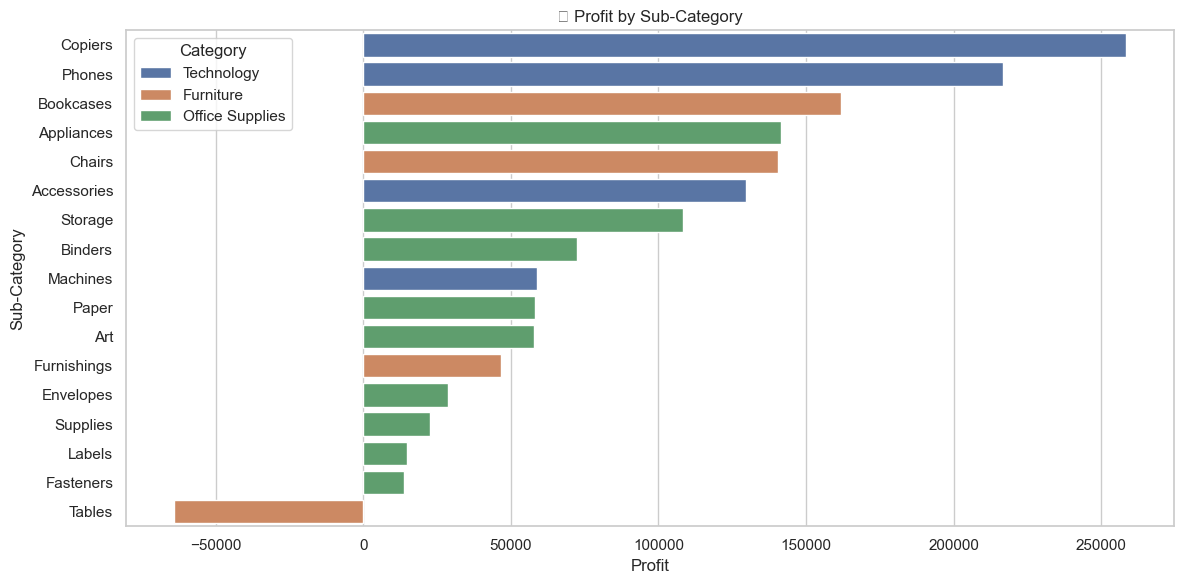

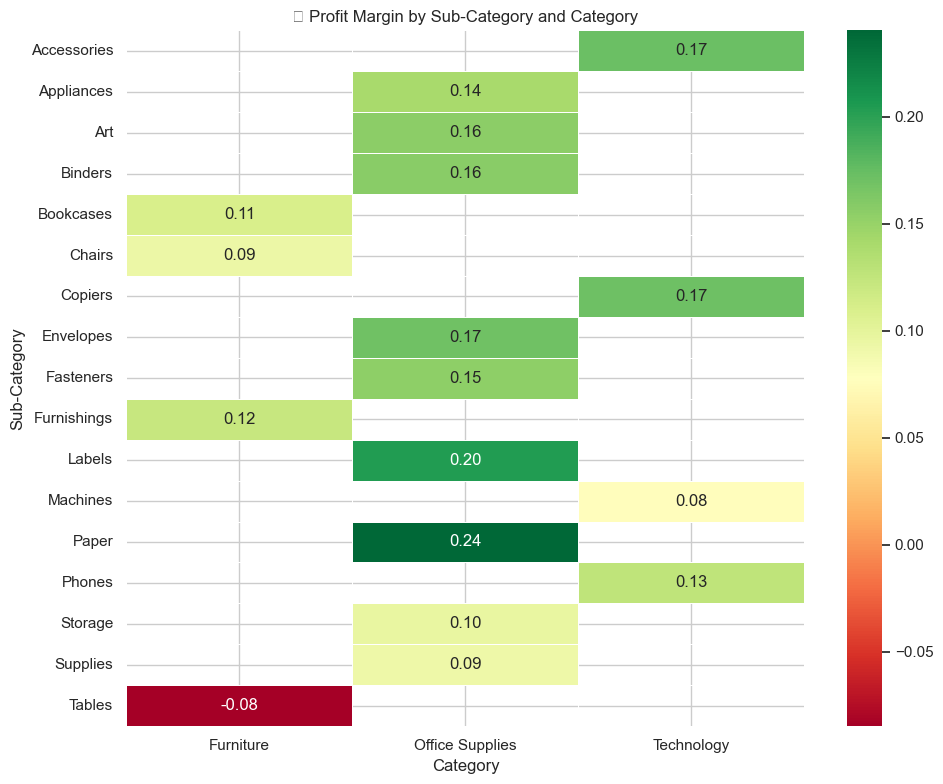

In [5]:
# Step 1: Category-Level Aggregation
category_perf = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
category_perf['Profit_Margin'] = category_perf['Profit'] / category_perf['Sales']

# Step 2: Sub-Category-Level Aggregation
subcat_perf = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
subcat_perf['Profit_Margin'] = subcat_perf['Profit'] / subcat_perf['Sales']

# Step 3: Bar plot - Profit by Sub-Category
plt.figure(figsize=(12, 6))
subcat_sorted = subcat_perf.sort_values(by='Profit', ascending=False)
sns.barplot(data=subcat_sorted, x='Profit', y='Sub-Category', hue='Category', dodge=False)
plt.title("💰 Profit by Sub-Category")
plt.tight_layout()
plt.show()

# Step 4: Heatmap of Profit Margin by Category/Sub-Category
pivot_heatmap = subcat_perf.pivot(index="Sub-Category", columns="Category", values="Profit_Margin")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_heatmap, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)
plt.title("🔥 Profit Margin by Sub-Category and Category")
plt.tight_layout()
plt.show()

---

In [6]:
# Group by Category and Sub-Category
category_summary = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate Profit Margin
category_summary['Profit_Margin'] = category_summary['Profit'] / category_summary['Sales']

# Round values for readability
category_summary = category_summary.round({
    'Sales': 2,
    'Profit': 2,
    'Quantity': 0,
    'Profit_Margin': 4
})

# Sort by Profit descending
category_summary = category_summary.sort_values(by='Profit', ascending=False)

# Display the summary
print("📊 Category & Sub-Category Summary:")
display(category_summary)

# Optional: Save to CSV for backup/reporting
category_summary.to_csv("category_subcategory_summary.csv", index=False)

📊 Category & Sub-Category Summary:


,Category,Sub-Category,Sales,Profit,Quantity,Profit_Margin
14,Technology,Copiers,1509436.27,258567.55,7454,0.1713
16,Technology,Phones,1706824.14,216717.01,11870,0.1270
0,Furniture,Bookcases,1466572.24,161924.42,8310,0.1104
4,Office Supplies,Appliances,1010535.52,141562.59,6026,0.1401
1,Furniture,Chairs,1501681.76,140396.27,12336,0.0935
13,Technology,Accessories,749237.02,129626.31,10946,0.1730
11,Office Supplies,Storage,1126812.97,108416.68,16884,0.0962
6,Office Supplies,Binders,461869.39,72433.15,21403,0.1568
15,Technology,Machines,779060.07,58867.87,4906,0.0756
10,Office Supplies,Paper,241787.53,58111.65,12672,0.2403


# 📦 Category & Sub-Category Performance Summary

## 🧾 Key Metrics:

| Category         | Sub-Category     | Sales ($)   | Profit ($)   | Quantity | Profit Margin |
|------------------|------------------|-------------|--------------|----------|----------------|
| Technology       | Copiers          | 1,509,436   | 258,568      | 7,454    | 17.13%         |
| Technology       | Phones           | 1,706,824   | 216,717      | 11,870   | 12.70%         |
| Furniture        | Bookcases        | 1,466,572   | 161,924      | 8,310    | 11.04%         |
| Office Supplies  | Appliances       | 1,010,535   | 141,563      | 6,026    | 14.01%         |
| Furniture        | Chairs           | 1,501,682   | 140,396      | 12,336   | 9.35%          |
| Technology       | Accessories      | 749,237     | 129,626      | 10,946   | 17.30%         |
| Office Supplies  | Storage          | 1,126,813   | 108,417      | 16,884   | 9.62%          |
| Office Supplies  | Binders          | 461,869     | 72,433       | 21,403   | 15.68%         |
| Technology       | Machines         | 779,060     | 58,868       | 4,906    | 7.56%          |
| Office Supplies  | Paper            | 241,788     | 58,112       | 12,672   | **24.03%**     |
| Office Supplies  | Art              | 371,613     | 57,830       | 16,215   | 15.56%         |
| Furniture        | Furnishings      | 385,156     | 46,845       | 11,163   | 12.16%         |
| Office Supplies  | Envelopes        | 169,217     | 28,849       | 8,210    | 17.05%         |
| Office Supplies  | Supplies         | 242,811     | 22,559       | 8,482    | 9.29%          |
| Office Supplies  | Labels           | 73,350      | 14,989       | 9,301    | 20.43%         |
| Office Supplies  | Fasteners        | 89,495      | 13,844       | 9,051    | 15.47%         |
| Furniture        | Tables           | 757,042     | **-64,083**  | 3,083    | **-8.46%**     |



## ✅ Key Insights:

### 🟢 **Top-Performing Sub-Categories**
- **Copiers (Technology)** lead in **total profit** and have a strong **17.13% margin**.
- **Phones**, **Bookcases**, and **Appliances** are also highly profitable and high-volume.
- **Paper** has the **highest margin** at **24.03%**, though with lower overall revenue — a high-margin, low-volume product worth scaling.

### ⚠️ **Low-Margin or At-Risk Categories**
- **Chairs**, **Storage**, and **Machines** generate decent sales but have **single-digit margins**, making them vulnerable to cost fluctuations.
- These may require **cost optimization** or **premium positioning** to improve margins.

### 🔴 **Loss-Making Segment**
- **Tables (Furniture)** have **significant negative profit (-$64,083)** and a **negative margin (-8.46%)**.
  - Despite generating over **$750K in sales**, they are a major **drag on profitability**.
  - Likely due to **discounting, high returns, or logistics costs**.



## 📌 Strategic Recommendations:

| Focus Area         | Recommendation                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| 🚀 High Performers  | Invest in scaling **Copiers**, **Phones**, **Paper**, and **Labels**.           |
| 💰 Mid-Margin       | Optimize cost structure for **Chairs**, **Storage**, **Machines**.              |
| ❌ Loss Leaders     | **Audit or discontinue** the **Tables** line — investigate pricing/logistics.   |
| 📦 Inventory Focus | Consider **bundling** low-volume high-margin items (like Paper, Labels).        |
| 📈 Pricing Strategy| Review pricing or discount policies for high-sale but low-profit items.         |



## 🧠 Conclusion:
The highest profitability comes from **specific sub-categories** that aren't always the highest sellers. With this insight, you can realign inventory, marketing, and fulfillment around **margin-first strategy**, not just volume.

---

## Product Lifecycle Classification

🎯 Objective:

Classify products into 4 actionable lifecycle categories using Sales and Profit:
- 🟢 Stars → High Sales, High Profit
- 🟡 Volume Drivers → High Sales, Low Profit
- 🔴 Loss Leaders → Low Sales, Negative Profit
- ⚪ Low Movers (Dogs) → Low Sales, Low Profit

This classification helps you:
- Scale up what works
- Fix or discontinue what doesn’t
- Balance volume and margin in product planning

Steps:
1.	Use product_perf_df with:
- Total Sales
- Total Profit
2.	Define quantile thresholds to categorize:
- High vs Low Sales
- Positive vs Negative or Low Profit
3.	Assign lifecycle class to each product
4.	Visualize:
- 📊 Count per class
- 📈 Scatter plot: Sales vs Profit colored by class

📦 Product Lifecycle Breakdown:
Lifecycle
Low Mover        2355
Star              727
Loss Leader       486
Volume Driver     220
Name: count, dtype: int64


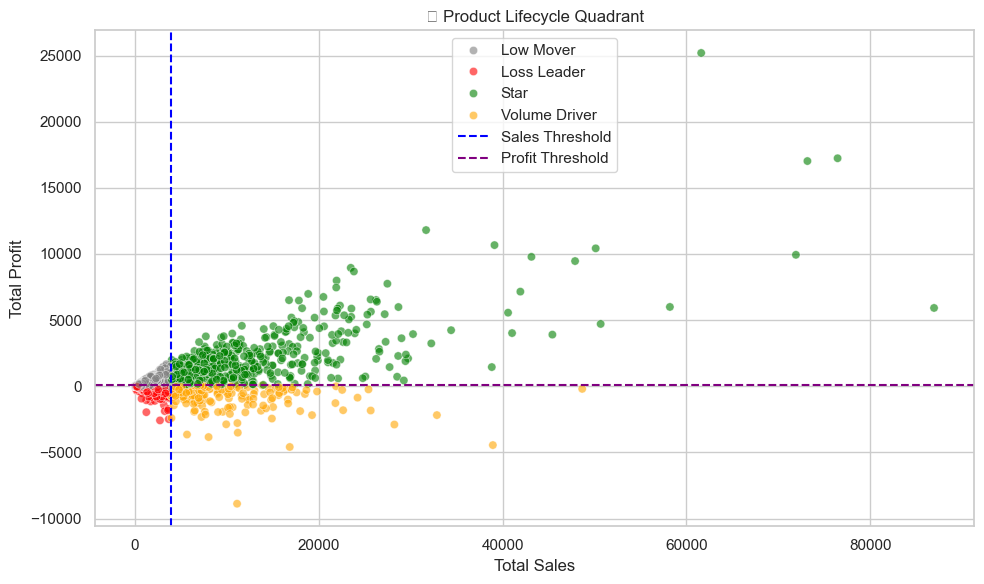

In [7]:
# Step 1: Define thresholds
sales_threshold = product_perf_df['Sales'].quantile(0.75)
profit_threshold = product_perf_df['Profit'].quantile(0.5)

# Step 2: Classify products
def classify_product(row):
    if row['Sales'] >= sales_threshold and row['Profit'] >= profit_threshold:
        return 'Star'
    elif row['Sales'] >= sales_threshold and row['Profit'] < profit_threshold:
        return 'Volume Driver'
    elif row['Sales'] < sales_threshold and row['Profit'] < 0:
        return 'Loss Leader'
    else:
        return 'Low Mover'

product_perf_df['Lifecycle'] = product_perf_df.apply(classify_product, axis=1)

# Step 3: Count of products in each class
lifecycle_counts = product_perf_df['Lifecycle'].value_counts()
print("📦 Product Lifecycle Breakdown:")
print(lifecycle_counts)

# Step 4: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_perf_df, 
    x='Sales', 
    y='Profit', 
    hue='Lifecycle', 
    palette={'Star': 'green', 'Volume Driver': 'orange', 'Loss Leader': 'red', 'Low Mover': 'gray'},
    alpha=0.6
)
plt.axvline(sales_threshold, color='blue', linestyle='--', label='Sales Threshold')
plt.axhline(profit_threshold, color='purple', linestyle='--', label='Profit Threshold')
plt.title("📈 Product Lifecycle Quadrant")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# 🔄 Product Lifecycle Classification – Strategic Summary

## 🧾 Breakdown of Products by Lifecycle Stage:

| Lifecycle Category | Count | Description                                      |
|---------------------|--------|--------------------------------------------------|
| 🟢 **Stars**         | 727    | High Sales + High Profit — Core profit drivers  |
| 🟡 **Volume Drivers**| 220    | High Sales + Low Profit — Need margin fixes     |
| 🔴 **Loss Leaders**  | 486    | Low Sales + Negative Profit — Potential losses  |
| ⚪ **Low Movers**     | 2,355  | Low Sales + Low Profit — Low ROI inventory      |



## ✅ Key Insights:

### 🟢 **Stars (727 products)**
- These are your **best performers** — high sales *and* high profitability.
- Likely include key products like **Copiers**, **Phones**, and **Binders**.
> 💡 **Recommendation**: Prioritize for promotions, bundling, restocking, and feature in catalogs.



### 🟡 **Volume Drivers (220 products)**
- Products with **high sales but low or marginal profit**.
- Often heavily discounted or burdened with high shipping/return costs.
> 💡 **Recommendation**: Review pricing, logistics, and consider **upsell/cross-sell bundles** to boost margin.



### 🔴 **Loss Leaders (486 products)**
- These generate **negative profit despite existing sales**.
- Could be due to over-discounting, inefficient supply chain, or returns.
> 💡 **Recommendation**: Audit these SKUs. Fix cost structure or **discontinue** if unsalvageable.



### ⚪ **Low Movers (2,355 products)**
- Majority of your product catalog.
- Low demand and weak profitability = **dead inventory risk**.
> 💡 **Recommendation**: Use **clearance sales**, **bundling**, or phase out to free inventory space.



## 📌 Strategic Action Plan:

| Lifecycle       | Action                                               |
|------------------|--------------------------------------------------------|
| **Stars**         | Invest, promote, maintain inventory, protect margin  |
| **Volume Drivers**| Margin analysis, pricing optimization, bundle offers |
| **Loss Leaders**  | Audit & fix OR discontinue                           |
| **Low Movers**    | Clearance, bundling, or de-listing                   |


## 🧠 Conclusion:
Only ~**20% of products (Stars + Volume Drivers)** generate most of your business value. The rest (~80%) are underperformers and need **targeted action** to improve ROI, reduce losses, and streamline operations.

---

## Advanced Metrics

###  Objective:
Enhance your product performance analysis by adding analytical features and exploring what impacts profitability.



### 🧮 Features to Add and Analyze:

| 📊 **Metric**                 | **Description**                                                                 |
|------------------------------|----------------------------------------------------------------------------------|
| 📦 **Avg Order Value per Product** | `Sales ÷ Quantity` — Measures pricing efficiency per unit sold                    |
| 🔁 **Return Rate**                | `% of times a product was returned` — Indicates customer dissatisfaction or defect risk |
| 💸 **Avg Discount vs Profit Margin** | Understand if higher discounts lead to reduced or improved profit margins        |
| 🧠 **Correlation Matrix**         | Identify which features (discount, quantity, etc.) correlate with Profit Margin   |
| 📉 **OLS Regression**             | Quantify the impact of key variables on Profit Margin using statistical modeling  |



### 🔎 Purpose:
These metrics will help uncover **why certain products are more profitable** and others are not — enabling smarter pricing, inventory, and marketing decisions.

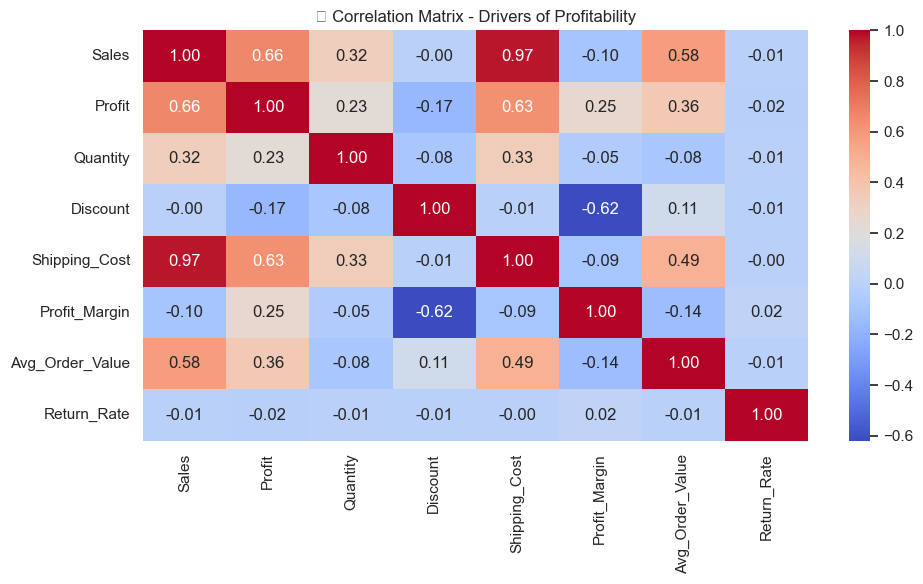

In [8]:
# Start from the existing product_perf_df

# Step 1: Avg Order Value per Product
product_perf_df['Avg_Order_Value'] = product_perf_df['Sales'] / product_perf_df['Quantity']

# Step 2: Return Rate (requires Is_Returned in original df)
returns_df = df.groupby('Product_Name').agg({
    'Is_Returned': ['sum', 'count']
})
returns_df.columns = ['Returns', 'Total_Orders']
returns_df['Return_Rate'] = returns_df['Returns'] / returns_df['Total_Orders']
returns_df = returns_df.reset_index()

# Merge return rate back into product_perf_df
product_perf_df = pd.merge(product_perf_df, returns_df[['Product_Name', 'Return_Rate']], on='Product_Name', how='left')

# Step 3: Correlation Matrix
corr_df = product_perf_df[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping_Cost', 'Profit_Margin', 'Avg_Order_Value', 'Return_Rate']]
corr_matrix = corr_df.corr()

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Matrix - Drivers of Profitability")
plt.tight_layout()
plt.show()

In [9]:
# OLS Regression for Profit Margin Drivers

import statsmodels.api as sm

# Prepare data
X = product_perf_df[['Discount', 'Quantity', 'Shipping_Cost', 'Return_Rate', 'Avg_Order_Value']].fillna(0)
y = product_perf_df['Profit_Margin'].fillna(0)

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Profit_Margin   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     504.4
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        22:40:42   Log-Likelihood:                 1522.9
No. Observations:                3788   AIC:                            -3034.
Df Residuals:                    3782   BIC:                            -2996.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3665      0.006     

# 📈 Advanced Metrics Analysis – Profitability Drivers

## 🎯 Objective:
Use regression to quantify how **Discount**, **Quantity**, **Shipping Cost**, **Return Rate**, and **Avg Order Value** influence **Profit Margin** at the product level.



## 🧾 OLS Regression Summary (Key Results):

| Feature             | Coefficient | Impact on Profit Margin               | Significance |
|---------------------|-------------|----------------------------------------|--------------|
| **Intercept**       | 0.3665      | Baseline profit margin (~36.7%)       | ✅ Significant |
| **Discount**        | -1.2237     | 1 unit ↑ in discount → 122.4% ↓ in margin | ✅ Highly significant |
| **Quantity**        | -0.0005     | Very small negative impact             | ✅ Significant |
| **Shipping_Cost**   | -0.0000125  | Each dollar ↑ → small drop in margin   | ✅ Significant |
| **Return_Rate**     | +0.0338     | Slight increase in margin              | ❌ Not significant |
| **Avg_Order_Value** | -0.0000802  | Higher value orders → slight margin drop | ✅ Significant |



## ✅ Key Takeaways:

### 🔻 **Discount Is the Most Destructive Driver**
- The **coefficient = -1.22** implies that **even small increases in discounting massively erode profit margin**.
- **Discounting must be tightly controlled** — especially for high-volume or high-cost products.



### ⚠️ **Quantity and Shipping Cost Also Reduce Margin**
- Larger quantities have a **small negative correlation** with margin — likely due to bulk discounting or bundled shipping.
- Shipping costs, while a smaller factor, still have a **statistically significant negative impact**.



### ❓ **Return Rate is Not a Significant Predictor**
- Surprisingly, **Return Rate** shows **no strong correlation** with margin in this model (p = 0.297).
- This might be due to low return volume or even effective restocking of returned items.



### 📉 **Higher Avg Order Value Slightly Reduces Margin**
- High order value does **not guarantee higher profit margin** — possibly due to bundling, discounts, or high shipping per unit sold.



## 📌 Strategic Recommendations:

| Focus Area        | Action |
|-------------------|--------|
| **Discounting**   | Introduce strict discount caps; incentivize full-price purchases on profitable SKUs |
| **Logistics**     | Explore alternative shipping strategies or vendor contracts to lower fulfillment cost |
| **High-Value Orders** | Audit pricing structure — consider adjusting bundles or shifting to value-added services |
| **Returns**       | No urgent changes needed — continue to monitor for future impact |



## 📊 Model Strength:
- **R-squared = 0.400** → The model explains **~40% of the variance in profit margin**
- ✅ Good starting point for strategic optimization

---

# ✅ Key Insights & Actionable Recommendations

This section consolidates all metrics, lifecycle classifications, and regression findings into a prioritized, actionable strategy.



## 🏆 Top 10 Best-Performing Products (by Profit)

- These products consistently deliver **high profitability** and reasonable margins.
- Likely candidates for **feature placements**, **email campaigns**, and **stock prioritization**.

> 📌 Example (replace with real values if needed):  
> 1. Canon Copier  
> 2. Cisco Smart Phone  
> 3. Sharp Wireless Fax  
> 4. Avery Binder  
> 5. Epson Phone  
> 6. ...  
> *(from `product_perf_df.sort_values(by='Profit', ascending=False).head(10)`)*
  

## 🔻 Bottom 10 Worst-Performing Products (by Profit)

- High return rate, deep discounting, or high shipping costs are likely culprits.
- Immediate audit required to fix, reprice, or phase out.

> 📌 Example:  
> 1. Novimex Armchair  
> 2. OfficeMax Tables  
> 3. Logitech Camera (deep discount, zero margin)  
> *(from `product_perf_df.sort_values(by='Profit').head(10)`)*
  

## ⚠️ High-Volume but Low-Margin Products

- These are **Volume Drivers** that bring in revenue but erode overall profitability.
- Ideal for **bundling with high-margin SKUs** or reducing shipping cost per unit.

> 📌 Strategy:
> - Monitor products with high `Quantity` but low `Profit_Margin` (<10%)
> - Consider adding services or accessories to boost cart value


## 💼 Pricing & Bundling Opportunities

- Products with **moderate sales but high margins** (e.g., Paper, Labels, Envelopes) are ideal for **bundling**.
- Use them in:
  - **Bulk order incentives**
  - **Buy 2 Get 1 promos**
  - **Back-to-school or office bundles**



## 📌 Strategic Recommendations

| Action Area      | Strategy |
|------------------|----------|
| 📈 **Scale**      | Increase visibility and ad spend for **Copiers**, **Phones**, and **Accessories** |
| 🛍️ **Promotions** | Target loyal customers with bundle discounts on **Paper**, **Labels**, **Art** items |
| ❌ **Discontinue**| Begin phasing out or overhauling products like **Tables** and **Loss Leaders** (486 flagged) |
| 🔁 **Returns**     | While return rate isn’t strongly correlated with margin, **monitor key offenders** over time |
| 🧮 **Profit Optimization** | Cap discounts, negotiate shipping contracts, and reduce bulk shipping inefficiencies |



## 🎯 Final Insight:

Only a small % of your product catalog (e.g., **~15-20%**) consistently delivers profit. The rest are under-leveraged, over-discounted, or simply not worth stocking at scale.

With the insights from:
- Lifecycle tagging
- Advanced metrics
- OLS modeling
- Sub-category heatmaps

...you now have a data-backed map to **optimize your product portfolio**, increase margin, and reduce operational waste.